In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:

data = pd.read_csv("student_study_schedule_data.csv")


In [4]:
print(data.head())
print(data.info())
print(data.describe())

   Student_ID  Study_Hours  Marks  Attendance
0           1          2.9   84.4          81
1           2          5.8  100.0          88
2           3          4.7  100.0          98
3           4          4.0   90.6          81
4           5          1.8   51.4          53
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Student_ID   100 non-null    int64  
 1   Study_Hours  100 non-null    float64
 2   Marks        100 non-null    float64
 3   Attendance   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB
None
       Student_ID  Study_Hours       Marks  Attendance
count  100.000000   100.000000  100.000000  100.000000
mean    50.500000     3.350000   78.300000   74.860000
std     29.011492     1.483206   19.475963   15.148437
min      1.000000     1.000000   34.000000   50.000000
25%     25.750000     1.975000   65.300

In [5]:

print(data.isnull().sum())

Student_ID     0
Study_Hours    0
Marks          0
Attendance     0
dtype: int64


In [6]:
data.fillna(data.median(), inplace=True)

In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Study_Hours', 'Attendance']])
data[['Study_Hours', 'Attendance']] = scaled_features

In [8]:
data['Study_Efficiency'] = data['Marks'] / (data['Study_Hours'] + 1e-5)
data['Attendance_Category'] = pd.cut(
    data['Attendance'], bins=[0, 50, 75, 100], labels=['Low', 'Medium', 'High']
)

# Encode categorical features
data = pd.get_dummies(data, columns=['Attendance_Category'], drop_first=True)


In [9]:
X = data.drop(['Student_ID', 'Marks'], axis=1)
y = data['Marks']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
y_pred = model.predict(X_test)

In [13]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 14.728989349999996
R² Score: 0.9664208123403889


In [16]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters and performance
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


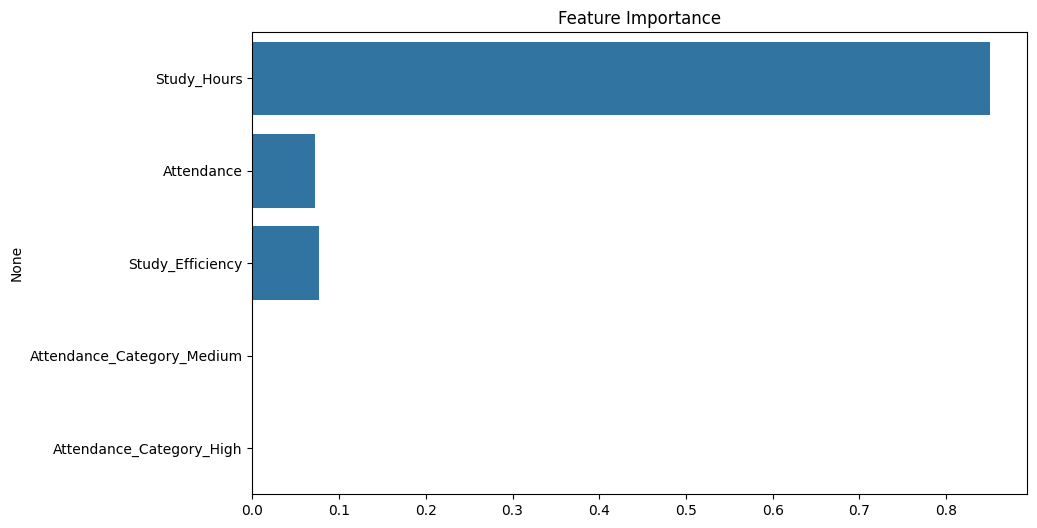

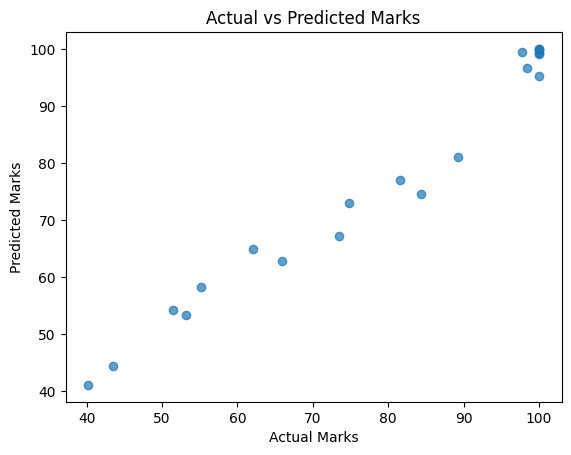

In [17]:
# Visualize feature importance
importances = best_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()

# Predicted vs Actual
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted Marks")
plt.show()


In [ ]:
import joblib

# Save the trained model
joblib.dump(best_model, "study_schedule_optimizer_model.pkl")


ImportError: cannot import name 'joblib' from 'sklearn.externals' (c:\Users\Tanmay\anaconda3\conda\Lib\site-packages\sklearn\externals\__init__.py)